# Ein binärer Klassifikator von Grund auf
Nachdem wir bisher uns mit Regressionsproblemen beschäftigt haben, möchten wir jetzt einen binären Klassifikator aufbauen. Hierbei handelt es sich um ein maschinelles Lernsystem, welches als Label nur zwei Ergebnisse zulässt. Ein Beispiel wäre z.B. ein Autohändler, der abhängig vom Ankaufpreis, dem Baujahr und dem Neupreis eines Autos wissen möchte, ob er das Auto ankaufen soll oder nicht. Dies erschließt er aus den Erfahrungen von bisherigen Verkäufen. Wir hätten dann 3 Eingangsvariablen (oder auch ```Features```) genannt und als Label hätten wir "Auto wurde gut verkauft", ja oder nein. Wieder würden wir mit einigen Datensätzen unser System trainieren und dann mit einer Reihe unabhängiger Datensätze die Qualität unserer Prognosen testen.<br><br>
<img width=300 height=300 class="imgright" src="Images/carsales.png">


Hierzu bekommen wir vom Händler diesen Datensatz von 50 Autos:

In [1]:
with open("Data/Autos3.txt","r") as fh:
    print("Ankaufspreis    Baujahr       Neupreis     wurde verkauft")
    counter,sum_apreis=0,0
    for line in fh:
        rawlist=line.rstrip().split(",")
        counter+=1
        print(f" {int(rawlist[0]):8d}       {int(rawlist[1]):6d}      {int(rawlist[2]):8d}          {bool(int((rawlist[3])))}")
        sum_apreis+=int(rawlist[0])
print(counter, "Autos")
print(f"mittlerer Ankaufspreis:  {sum_apreis/50}")


Ankaufspreis    Baujahr       Neupreis     wurde verkauft
    17376         2012         27982          True
    18746         1995         28790          False
    11788         2011         19423          True
    16021         2013         24464          True
    17609         2021         27054          True
    25418         2015         35951          False
    27035         2002         35659          False
    28440         2006         39808          False
    15481         2015         23066          True
    13617         2006         19866          True
    25126         2004         36969          False
    11459         2001         19421          False
    23170         2017         28383          False
    27691         2020         35542          False
    21934         2006         30645          False
    25162         2009         36553          False
    11046         2011         16644          True
    15959         2008         27150          True
    10416     

Diesen teilen wir auf in einen Teildatensatz von 200 Autos, den der Klassifikator zum trainieren braucht und 100 Autos, bei denen wir die Qualität des Systems testen wollen.<br>
Wir wollen unser System so aufsetzen, dass wir als Eingabe für den Klassifikator unsere 3 Eingangsvariablen (x1,x2,x3) verwenden und sie mit den "Gewichten" (w1,w2,w3)  multiplizieren als Linearkombination. Also:<br>
<br>$$y_{vorausgesagt} = w1 * x1 + w2 * x2 + w3 * x3...$$

Im Gegensatz zu unseren Regressionsprogrammen haben wir hier nur True und False als Labels.
Wollen wir die Daten zum Beispiel als Zusammenhang zwischen Ankaufspreis (x1) und Label (als 0 oder 1) darstellen, erhalten wir folgendes Bild.


 Mean 19757.113333333335


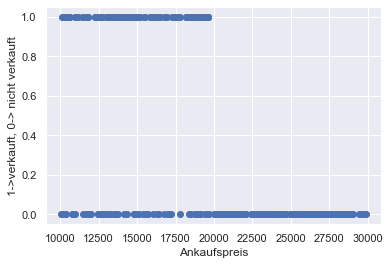

In [2]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set()
with open("Data/Autos3.txt","r") as fh:
    #print("Ankaufspreis    Baujahr       Neupreis     wurde verkauft")
    
    L=[]
    x0,x1,x2,x3,y=[],[],[],[],[]
    for line in fh:
        rawlist=line.rstrip().split(",")
        L.append(rawlist)
        
    for line in L:
        
        x0.append(float(line[0]))#Ankaufspreis        
        y.append(int(line[3]))
mean=sum(x0)/len(x0)
print(f" Mean {mean}")
plt.xlabel("Ankaufspreis")
plt.ylabel("1->verkauft, 0-> nicht verkauft")
plt.scatter(x0,y)

Wir hatten ja bei unserem Regressions-Lernprogramm betont, dass wir von einem annähernd linearen Zusammenhang zwischen den Features und den Labeln ausgehen. Dies ist hier offensichtlich überhaupt nicht der Fall. Eine solche Gerade hier einzuzeichnen ist völlig sinnlos. 

In diesem Fall arbeitet man beim maschinellen Lernen gerne mit der sogenannten Sigmoid-Funktion <br>
$$sigmoid(x) = \frac{1}{1+e^{-x}}$$
Diese hat einen Wertebereich zwischen 0 und 1. Dazwischen gibt es einen glatten Übergang.


<br><br><img width=400 height=400 class="imgright" src="Images/sigmoid.png"><br><br>

Für uns sähe eine Sigmoidfunktion (1-sigmoid) für unsere Werte z.B. den Ankaufspreis wie unten aus, sie spiegelt die Verteilung wesentlich besser.




 Mean 19757.113333333335


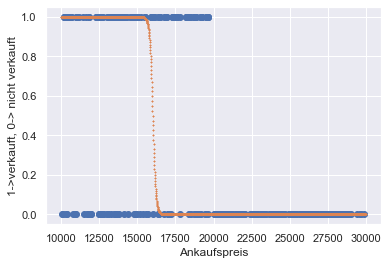

In [3]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set()
with open("Data/Autos3.txt","r") as fh:
    #print("Ankaufspreis    Baujahr       Neupreis     wurde verkauft")
    
    L=[]
    x0,x1,x2,x3,y=[],[],[],[],[]
    for line in fh:
        rawlist=line.rstrip().split(",")
        L.append(rawlist)
        
    for line in L:
        
        x0.append(float(line[0]))#Ankaufspreis        
        y.append(int(line[3]))
mean=sum(x0)/len(x0)
print(f" Mean {mean}")
plt.xlabel("Ankaufspreis")
plt.ylabel("1->verkauft, 0-> nicht verkauft")
plt.scatter(x0,y)  
plt.scatter([x for x in range(10000,30000,10)],[1/(1+math.e**(x/100-160)) for x in range(10000,30000,10)],s=1,marker="x")


Wenn wir uns vorstellen, dass wir die Werte unserer Linearkombination der Eingangswerte<br><br>
$$y_{vorausgesagt} = w1 * x1 + w2 * x2 + w3 * x3...$$<br>
in diese Sigmoid-Funktion eingeben würden, hätten wir nur Werte zwischen 0 und 1.<br>
Wir würden also als Fehlerfunktion<br><br>
$$Fehler = sigmoid(w1 * x1 + w2 * x2 + w3 * x3... - ytrue)$$ <br> verwenden, wobei ytrue der wahre Label (0 oder 1) wäre.



Um unser Gradientenabstiegs-Verfahren anwenden zu können, müssen wir unsere Fehlerfunktion nach den Gewichten w1,w2... differenzieren, und wir müssen prüfen, ob unsere vorherige Formel hierzu geeignet ist, da eine völlig andere Funktion vorliegt. Würden wir versuchen würden, weiterhin mit unserer quadratischen Fehlersumme zu arbeiten mit<br><br>
$$Fehlersumme = \sum_{i=1}^{n} sigmoid(y1_i * w1 + y2_i * w2 ... - ytrue_i))^2 $$<br> ergäbe sich zum Beispiel eine Fläche wie diese, wenn wir den Fehler für w1 und w2 darstellen. <br><img width=600 height=600 class="imgright" src="Images/w2fehler.png">
    
Wenn wir hier zum Beispiel nach w1 auftragen mit  w2 = 2, ergäbe sich:<br><br><img width=600 height=600 class="imgright" src="Images/w1square.png"><br><br>Von einer glatten differenzierbaren Kurve kann damit nicht die Rede sein.


Wir müssen also überlegen, wie wir unsere Fehlerkurve differenzierbar machen und die Sigmoid-Funktion nutzen können, die Fehlerquadratmethode zusammen mit der Sigmoid-Funktion ist sicher nicht geeignet.

Unsere neue Fehlerfunktion soll nur <b>ein</b> eindeutiges Minimum haben und eine möglichst glatte Oberfläche, damit das Gradientenabstiegsverfahren zu diesem Minimum führt. Dafür gibt es viele Möglichkeiten, beim maschinellen Lernen wird hierbei aber meist die logistische Verlustfunktion verwendet. Dabei soll ```yv``` der vorhergesagte y-Wert sein und ```y``` der wahre Label.<br><br>
$$Fehlersumme = \sum_{i=1}^{n} (y_i * log (yv_i) + (1 - y_i) * log (1 - yv_i)) $$<br>

Diese Funktion sieht vielleicht zunächst wild aus, ist aber leicht zu berechnen und gibt uns eine Fehlerfunktion, die den obigen Kriterien entspricht. Wir sehen ein klares Minimum und die Oberfläche ist glatt und ohne lokale Minima.


<img width=600 height=600 class="imgright" src="Images/Logloss.png">

Es ergibt sich nun die Frage, wie die Ableitung der Fehlerfunktion für ein bestimmtes Gewicht w aussieht. 
Hier ergibt sich:<br><br>
$$dmittlereFehlersumme/dw =  1/n\sum_{i=1}^{n} x_i * (yv_i- y_i)  $$<br><br>
Unsere Fehlerfunktion lässt sich also auch einfach ableiten. Wir adaptieren unser Programm für multidimensionale Regression auf unsere neue Fragestellung mit der neuen Fehlerfunktion. Im Programm sehen wir, dass wir bei "trainieren" unser Gradientabstiegsverfahren für alle Gewichte w1,w2,w3 anwenden. Wir haben auch noch ein zusätzliches Gewicht w4 eingeführt, das wir mit einem konstanten Wert 1 für alle Datensätze multiplizieren. Dies entspricht dem Bias aus Kapitel 5, den wir auch hier anwenden wollen.


In [4]:

import math as m 
import random as rd
rd.seed(0)
def sigmoid(x):
    if x<-40: 
        return 0.0 #sonst overflow error durch zu kleine Werte z.B. 1E-530
        
    return 1/(1+m.exp(-x))

def vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4):
    yvor=[]
    for i in range(len(x1)):
        yvor.append(sigmoid(x1[i]*w1+x2[i]*w2+x3[i]*w3+x4[i]*w4))
    return yvor

def verlust(yvor,y):    
    sum_loss=0
    for i in range(len(y)):
        sum_loss-=y[i]* m.log(yvor[i])+(1-y[i])*m.log(1-yvor[i])  #hier die logloss Funktion zur Fehlerberechnung 
    return sum_loss/len(y)

def gradient(yvor,y,x1,x2,x3,x4):   #Ableitung der logloss Funktion zur Gradientbestimmung 
    sum1,sum2,sum3,sum4=0,0,0,0
    for  i in range(len(x1)):
        sum1-=(yvor[i]-y[i])*x1[i]
        sum2-=(yvor[i]-y[i])*x2[i]
        sum3-=(yvor[i]-y[i])*x3[i]
        sum4-=(yvor[i]-y[i])*x4[i]
    return sum1,sum2,sum3,sum4

def trainieren(x1,x2,x3,x4,y,reps,lernrate):
    w1,w2,w3,w4=0,0,0,0
    for i in range(reps):
        yvor=vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4)
        wlist=gradient(vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4),y,x1,x2,x3,x4)        
        w1+=wlist[0]/len(x1)*lernrate
        w2+=wlist[1]/len(x1)*lernrate
        w3+=wlist[2]/len(x1)*lernrate
        w4+=wlist[3]/len(x1)*lernrate        
    return w1,w2,w3,w4
    
def test(x1,x2,x3,x4,y,w1,w2,w3,w4):    
    yvor=vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4)    
    richtig=0
    for i in range(len(x1)):
        print(f"Klassifikator: {round(yvor[i])} Eingabedaten: {y[i]}",end="")
        if round(yvor[i])==y[i]:
            print("  richtig klassifiziert")
            richtig+=1
        else:
            print("falsch")
    return richtig
    
    
Examples=[]
with open("Data/Autos3.txt", "r") as fh:    
    for line in fh:        
        x1,x2,x3,y=line.rstrip().split(",") 
        Examples.append([x1,x2,x3,1,y]) #hier der konstante Wert 1 für den sog. Bias
        
x1,x2,x3,x4,y=[],[],[],[],[]
for elem in Examples: 
    x1.append(int(elem[0])) #x1
    x2.append(int(elem[1])) #x2
    x3.append(int(elem[2])) #x3
    x4.append(int(elem[3])) #Bias
    y.append(int(elem[4])) #Label
x1tr,x2tr,x3tr,x4tr,ytr=[],[],[],[],[]

for i in range(200):
    num=rd.randint(0,299-i)
    x1tr.append(x1[num])
    x2tr.append(x2[num])
    x3tr.append(x3[num])
    x4tr.append(x4[num])
    ytr.append(y[num])
    x1.remove(x1[num])
    x2.remove(x2[num])
    x3.remove(x3[num])
    x4.remove(x4[num])
    y.remove(y[num])
    
    
w1,w2,w3,w4=trainieren(x1tr,x2tr,x3tr,x4tr,ytr,30000,0.001)
richtige=test(x1,x2,x3,x4,y,w1,w2,w3,w4)
print(w1,w2,w3,w4)
print(f" Accuracy {richtige/100:5.2f}")
print(f"{richtige} von 100 richtig")

        


Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 1 Eingabedaten: 0falsch
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 1 Eingabedaten: 0falsch
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabeda

 Dieser Klassifizierer erkennt nur 64 von 100 Testdaten richtig, ein zu erwartendes Ergebnis für so wenige Trainingsdatensätze. Wir sehen auch die Endwerte für unsere 4 Gewichte.

In unserem Minibeispiel können wir es uns noch einfacher machen und immer dann, wenn der Wert der Summe<br><br> $$x1_i* w1 + x2_i*w2 + x3_i*w3 + w4  $$<br><br> kleiner als .5 ist, den Vorhersagewert auf 0 setzen und im anderen Fall auf 1. Wir würden dann eine solche Stufenfunktion für den Vorhersagewert verwenden.<br><img width=600 height=600 class="imgright" src="Images/Stufe.png"><br>
Unsere Fehlersumme würden wir für jeden unserer Eingabewerte x1,x2 und x3 so verwenden.<br><br>
$$Fehlersumme für x1 =  \sum_{i=1}^{n} x1_i * (yv_i- y_i)  $$<br><br> 
Unsere Gewichte würden wir in jedem Schritt so verändern:(z.B. w1)
<br><br>
$$w1_{neu} = w1_{alt} + \sum_{i=1}^{n} x1_i * (yv_i- y_i) / n * lernrate  $$<br><br> 
also:<br><br>
$$w1_{neu} = w1_{alt} + Fehlersumme für x1 / n * lernrate $$


In [5]:
import math as m 
import random as rd
rd.seed(0)
def sigmoid(x):
    if x<-40: 
        return 0.0 #sonst overflow error durch zu kleine Werte z.B. 1E-530
        
    return 1/(1+m.exp(-x))

def vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4):
    yvor=[]
    for i in range(len(x1)):
        yvor.append(x1[i]*w1+x2[i]*w2+x3[i]*w3+x4[i]*w4)  
    yvor_min=min(yvor)
    yvor_max=max(yvor)
    border=(yvor_max-yvor_min)/2 #Stufenfunktion
    for i in range(len(x1)):
        if yvor[i]>=border:
            yvor[i]=1.0
        else:
            yvor[i]=0.0
    return yvor

def gradient(yvor,y,x1,x2,x3,x4):
    sum1,sum2,sum3,sum4=0,0,0,0
    for  i in range(len(x1)):
        sum1-=(yvor[i]-y[i])*x1[i]
        sum2-=(yvor[i]-y[i])*x2[i]
        sum3-=(yvor[i]-y[i])*x3[i]
        sum4-=(yvor[i]-y[i])*x4[i]
    return sum1,sum2,sum3,sum4

def trainieren(x1,x2,x3,x4,y,reps,lernrate):
    w1,w2,w3,w4=0,0,0,0    
    for i in range(reps):
        yvor=vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4)        
        wlist=gradient(vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4),y,x1,x2,x3,x4)        
        w1+=wlist[0]/len(x1)*lernrate
        w2+=wlist[1]/len(x1)*lernrate
        w3+=wlist[2]/len(x1)*lernrate
        w4+=wlist[3]/len(x1)*lernrate        
    return w1,w2,w3,w4
    
def test(x1,x2,x3,x4,y,w1,w2,w3,w4):    
    yvor=vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4)    
    richtig=0    
    for i in range(len(x1)):
        print(f"Klassifikator: {round(yvor[i])} Eingabedaten: {y[i]}",end="")
        if round(yvor[i])==y[i]:
            print("  richtig klassifiziert")
            richtig+=1
        else:
            print("  falsch")
    return richtig
    
    
Examples=[]
with open("Data/Autos3.txt", "r") as fh:    
    for line in fh:        
        x1,x2,x3,y=line.rstrip().split(",") 
        Examples.append([x1,x2,x3,1,y])
        
x1,x2,x3,x4,y=[],[],[],[],[]
for elem in Examples: 
    x1.append(int(elem[0])) #x1
    x2.append(int(elem[1])) #x2
    x3.append(int(elem[2])) #x3
    x4.append(int(elem[3])) #Bias
    y.append(int(elem[4])) #Label
x1tr,x2tr,x3tr,x4tr,ytr=[],[],[],[],[]

for i in range(200):
    num=rd.randint(0,299-i)
    x1tr.append(x1[num])
    x2tr.append(x2[num])
    x3tr.append(x3[num])
    x4tr.append(x4[num])
    ytr.append(y[num])
    x1.remove(x1[num])
    x2.remove(x2[num])
    x3.remove(x3[num])
    x4.remove(x4[num])
    y.remove(y[num])
    
    
w1,w2,w3,w4=trainieren(x1tr,x2tr,x3tr,x4tr,ytr,30000,0.001)
richtige=test(x1,x2,x3,x4,y,w1,w2,w3,w4)
print(w1,w2,w3,w4)
print(f" Accuracy {richtige/100:5.2f}")
print(f"{richtige} von 100 richtig")
        


Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 1 Eingabedaten: 0  falsch
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 1 Eingabedaten: 0  falsch
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Einga

Interessant ist der Blick auf die Gewichte nach dem Training.<br>

w1 = -27.1 <br>
w2 =  232.6 <br>
w3 =  5.4<br> 
w4 = 0.097<br><br>
Wir sehen hier, dass der Verkaufserfolg negativ mit dem Ankaufspreis zusammenhängt (Gewicht -27.1), während das Baujahr den Verkaufserfolg stark positiv beeinflusst (Gewicht 232) und der Neupreis nur schwach positiv mit dem Verkaufserfolg zusammenhängt, aber dies schwächer (5.4).
Aber haben die Gewichte nicht auch etwas mit der Grösse des Eingabewertes zu tun? Was wäre, wenn wir die Werte alle in den gleichen Bereich normieren würden, also sowohl die Preise als auch das Baujahr auf Werte zwischen 0 und 1 im Verhältnis zum Maximum verändern würden? Denn die Baujahre schwanken nur zwischen 1995 und 2021, während z.B. der Ankaufspreis sich zwischen 10000 und 30000 Euro bewegt. Das Ergebnis zeigt das untenstehende Programm.

In [6]:
import math as m 
import random as rd
rd.seed(0)

def vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4):
    yvor=[]
    for i in range(len(x1)):
        yvor.append(sigmoid(x1[i]*w1+x2[i]*w2+x3[i]*w3+x4[i]*w4))
    return yvor

def gradient(yvor,y,x1,x2,x3,x4):
    sum1,sum2,sum3,sum4=0,0,0,0
    for  i in range(len(x1)):
        sum1-=(yvor[i]-y[i])*x1[i]
        sum2-=(yvor[i]-y[i])*x2[i]
        sum3-=(yvor[i]-y[i])*x3[i]
        sum4-=(yvor[i]-y[i])*x4[i]
    return sum1,sum2,sum3,sum4

def trainieren(x1,x2,x3,x4,y,reps,lernrate):
    w1,w2,w3,w4=0,0,0,0
    for i in range(reps):
        yvor=vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4)        
        wlist=gradient(vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4),y,x1,x2,x3,x4)        
        w1+=wlist[0]/len(x1)*lernrate
        w2+=wlist[1]/len(x1)*lernrate
        w3+=wlist[2]/len(x1)*lernrate
        w4+=wlist[3]/len(x1)*lernrate        
    return w1,w2,w3,w4
    
def test(x1,x2,x3,x4,y,w1,w2,w3,w4):    
    yvor=vorhersagen(x1,x2,x3,x4,w1,w2,w3,w4)    
    richtig=0
    for i in range(len(x1)):
        print(f"Klassifikator: {round(yvor[i])} Eingabedaten: {y[i]}",end="")
        if round(yvor[i])==y[i]:
            print("  richtig klassifiziert")
            richtig+=1
        else:
            print("falsch")
    return richtig
    
    
Examples=[]
with open("Data/Autos3.txt", "r") as fh:    
    for line in fh:        
        x1,x2,x3,y=line.rstrip().split(",") 
        Examples.append([x1,x2,x3,1,y])
        
x1,x2,x3,x4,y=[],[],[],[],[]
    
for elem in Examples: 
    x1.append(int(elem[0])) #x1
    x2.append(int(elem[1])) #x2
    x3.append(int(elem[2])) #x3
    x4.append(int(elem[3])) #Bias
    y.append(int(elem[4])) #y_werte

##############normieren###########################
x1max,x2max,x3max=max(x1),max(x2),max(x3)
x1min,x2min,x3min=min(x1),min(x2),min(x3) 
for i in range(len(x1)):
    x1[i]=(x1[i]-x1min)/x1max 
    x2[i]=(x2[i]-x2min)/x2max
    x3[i]=(x3[i]-x3min)/x3max
###################################################

x1tr,x2tr,x3tr,x4tr,ytr=[],[],[],[],[]

for i in range(200):
    num=rd.randint(0,299-i)
    x1tr.append(x1[num])
    x2tr.append(x2[num])
    x3tr.append(x3[num])
    x4tr.append(x4[num])
    ytr.append(y[num])
    x1.remove(x1[num])
    x2.remove(x2[num])
    x3.remove(x3[num])
    x4.remove(x4[num])
    y.remove(y[num])
    
    
w1,w2,w3,w4=trainieren(x1tr,x2tr,x3tr,x4tr,ytr,30000,0.001)
richtige=test(x1,x2,x3,x4,y,w1,w2,w3,w4)
print(w1,w2,w3,w4)
print(f" Accuracy {richtige/100:5.2f}")
print(f"{richtige} von 100 richtig")
        

Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassifiziert
Klassifikator: 0 Eingabedaten: 0  richtig klassi

Diese Gewichte verhalten sich auch nach der Normierung im Vergleich zueinander zwar ähnlich wie die Gewichte ohne Normierung (w1 stark negativ, w2 leicht positiv, w3 leichter negativ). Die Werte selbst sind aber sehr unterschiedlich. Insbesondere ist das sehr hohe positive Gewicht für das Baujahr im Verhältnis stark reduziert worden. Für eine richtige Interpretation ist die Skalierung sehr wichtig. Wir sehen außerdem, daß die Accuracy etwas gewonnen hat.


Es ist leicht, den Klassifikator auszubauen auf mehr als eine Entscheidung, also nicht nur binär mit "ja" oder "nein", sondern auch auf mehrere Klassen. Unser Beispiel könnte man so auf die Ergebnisklassen "einfach zu verkaufen" , "mittelgradig zu verkaufen", "schwer zu verkaufen" und "gar nicht zu verkaufen" ausbauen. Die einfachste Möglichkeit wäre es, den Klassifikator für jede Ergebnisklasse binär auszuführen mit "gehört in die Klasse" oder "gehört nicht in die Klasse" als Label, und dann das Ergebnis mit der höchsten Wahrscheinlichkeit auszugegeben.<br>
Wir würden unsere Datensätze im Training in jeweils vier Durchläufen so trainieren, dass zum Beispiel für die Entscheidung  "gehört in Klasse ´einfach zu verkaufen´ oder nicht", die Gewichte optimiert würden.
Bei der Vorhersage würden wir dann mit für unsere vier Klassen vier Werte für die Zugehörigkeit zu der jeweiligen Klasse erhalten und uns dann z.B. für die Klasse mit dem höchsten Zugehörigkeitswert entscheiden. Hier ein Beispiel mit einem neuronalen Netzwerk, was wir später besprechen. <br><br><img width=1500 height=1500 class="imgright" src="Images/Neuronales_Netzwerk1.png"><br><br>




Hier haben wir uns für die Klasse mit dem Label 3 entschieden, weil der Klassifikator für diese den höchsten Vorhersagewert erzielte. Was aber verloren geht, ist die Information, wie sicher diese Vorhersage war. Denn im unten gezeigten Beispiel wäre die Klassifizierung viel eindeutiger gewesen.<br><br><img width=1800 height=1500 class="imgright" src="Images/Neuronales_Netz2.png"><br><br>

Wir wollen nicht die Verteilung der Ergebnisse verlieren, wenn wir wie oben agieren und nur das beste Ergebnis nehmen. Sehen wir uns die Zahlen an den Ausgängen an, erkennen wir, daß wir nicht einfach die Zahl als Wahrscheinlichkeit interpretieren können. In diesem Fall müßten alle Ausgänge zusammen die Summe 1 ergeben. Dann könnten wir sagen, die Wahrscheinlichkeit, daß die Sample zur Klasse X gehört ist p(X). Wir müssen irgendwie unsere Ergebnisse normieren.<br><br> Was sind die Anforderungen daran?<br>die Ergebnisse sollen auf Werte im Intervall [0,1] tranformiert werden<br>die Werte der Ergebnisse sollen in Summe 1 ergeben<br>die Werte der Ergebnisse sollen die Größe der Eingangswerte abbilden <br><br>

Hierfür gibt es die Softmax Funktion, die häufig am Ausgang eines Klassifikators angewendet wird, um die Ergebnisse als Wahrscheinlichkeiten interpretieren zu können. Sie ist definiert als:<br><b><img width=800 src="Images/Softmax.png" /><br><br>

Dies erlaubt uns die Interpretation in Wahrscheinlichkeiten. Für unser Beispiel ergibt sich:<br>
<br><img width=800 src="Images/Softmax2.png" />    
    

Wir haben jetzt eine Verteilung mit den gewünschten Eigenschaften. Dabei erkennen wir, daß durch Softmax die numerischen Unterschiede der Ausgangswerte näher aneinander liegen. In der sklearn Bibliothek, die wir später besprechen, haben viele ML-Algorithmen die Möglichkeit, die Ergebnisse nach Durchlaufen einer Softmax Funktion anzuzeigen. z.B. (multi_class= ‘multinomial’) für logistische Regression, (mlp.out_activation_='softmax') für MPLClassifier... s.u.

In [7]:
from sklearn.neural_network import MLPClassifier as mlp
mlp.out_activation_='softmax'